In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('preprocessed train')
pd.set_option('display.max_columns',None)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2003.0,2003.0,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706.0,5.0,0.0,150.0,856.0,1.0,0.0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,2003.0,1.0,2.0,548.0,4.0,4.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6.0,8.0,1976.0,1976.0,1.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,978.0,5.0,0.0,284.0,1262.0,1.0,0.0,1.0,4.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,6.0,6.0,1.0,1.0,1976.0,1.0,2.0,460.0,4.0,4.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2001.0,2002.0,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486.0,5.0,0.0,434.0,920.0,1.0,0.0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,1.0,2001.0,1.0,2.0,608.0,4.0,4.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7.0,5.0,1915.0,1970.0,1.0,1.0,13.0,15.0,2.0,0.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,216.0,5.0,0.0,540.0,756.0,1.0,2.0,1.0,4.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,5.0,1998.0,2.0,3.0,642.0,4.0,4.0,2.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8.0,5.0,2000.0,2000.0,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,655.0,5.0,0.0,490.0,1145.0,1.0,0.0,1.0,4.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,1.0,2000.0,1.0,3.0,836.0,4.0,4.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3.0,62.0,7917.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,6.0,5.0,1999.0,2000.0,1.0,1.0,12.0,13.0,2.0,0.0,3.0,4.0,2.0,2.0,3.0,3.0,5.0,0.0,5.0,0.0,953.0,953.0,1.0,0.0,1.0,4.0,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,3.0,7.0,6.0,1.0,1.0,1999.0,1.0,2.0,460.0,4.0,4.0,2.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8.0,4.0,175000.0
1456,20.0,3.0,85.0,13175.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,6.0,6.0,1978.0,1988.0,1.0,1.0,9.0,10.0,3.0,119.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,790.0,4.0,0.0,589.0,1542.0,1.0,4.0,1.0,4.0,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,3.0,7.0,2.0,2.0,1.0,1978.0,2.0,2.0,500.0,4.0,4.0,2.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8.0,4.0,210000.0
1457,70.0,3.0,66.0,9042.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,7.0,9.0,1941.0,2006.0,1.0,1.0,5.0,5.0,2.0,0.0,0.0,2.0,4.0,3.0,1.0,3.0,2.0,275.0,5.0,0.0,877.0,1152.0,1.0,0.0,1.0,4.0,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,2.0,9.0,6.0,2.0,1.0,1941.0,1.0,1.0,252.0,4.0,4.0,2.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8.0,4.0,266500.0
1458,20.0,3.0,68.0,9717.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,5.0,6.0,1950.0,1996.0,3.0,1.0,8.0,8.0,2.0,0.0,3.0

In [3]:
from sklearn.model_selection import train_test_split
X=df.drop(labels=['SalePrice'],axis=1)
y=df['SalePrice']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

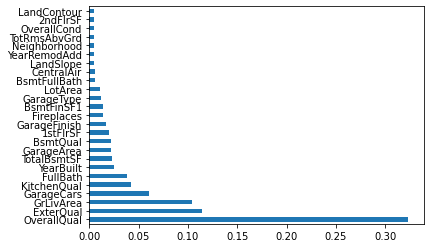

OverallQual     0.323197
ExterQual       0.114840
GrLivArea       0.104615
GarageCars      0.060816
KitchenQual     0.042138
FullBath        0.038768
YearBuilt       0.024697
TotalBsmtSF     0.023033
GarageArea      0.022547
BsmtQual        0.021873
1stFlrSF        0.020142
GarageFinish    0.017169
Fireplaces      0.013711
BsmtFinSF1      0.013588
GarageType      0.011627
LotArea         0.010628
BsmtFullBath    0.005810
CentralAir      0.005598
LandSlope       0.005285
YearRemodAdd    0.005243
Neighborhood    0.005227
TotRmsAbvGrd    0.005161
OverallCond     0.005031
2ndFlrSF        0.004991
LandContour     0.004814
dtype: float64


In [4]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X_train,y_train)
# print(model.feature_importances_)
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
f=feat_imp.nlargest(25).plot(kind='barh')
plt.show()

print(feat_imp.nlargest(25))

In [5]:
x=df.loc[:,['OverallQual','ExterQual','GrLivArea','GarageCars','FullBath',
           'YearBuilt','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
            'BsmtQual','TotalBsmtSF','BsmtFinSF1','GarageFinish','LotArea',
            'YearRemodAdd','GarageYrBlt','CentralAir','GarageType','2ndFlrSF',]]
#             'BsmtFullBath','OverallCond','LotFrontage','TotRmsAbvGrd','BsmtFullBath']]
y=df['SalePrice']


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [7]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
clf =LazyRegressor(predictions=True)
models,predictions=clf.fit(x_train,x_test,y_train,y_test)
pd.DataFrame(models)

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████████████████████████████████████| 42/42 [00:07<00:00,  5.83it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.89,0.90,21944.24,0.30
HistGradientBoostingRegressor,0.89,0.89,22761.10,1.11
LGBMRegressor,0.88,0.89,22952.72,0.24
RandomForestRegressor,0.88,0.89,23111.23,0.79
XGBRegressor,0.88,0.89,23230.22,0.19
ExtraTreesRegressor,0.88,0.89,23300.43,0.76
HuberRegressor,0.88,0.88,23619.94,0.07
PassiveAggressiveRegressor,0.88,0.88,23648.38,0.06
BaggingRegressor,0.87,0.88,23874.00,0.14


In [8]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print('train score',model.score(x_train,y_train))
print('test score',model.score(x_test,y_test))


train score 0.9999928857183045
test score 0.888538752830338


In [9]:
from sklearn.ensemble import GradientBoostingRegressor
model_grad=GradientBoostingRegressor()
model_grad.fit(x_train,y_train)
pred=model_grad.predict(x_test)

print('train score',model_grad.score(x_train,y_train))
print('test score',model_grad.score(x_test,y_test))

train score 0.9510452046078337
test score 0.9000592296396952


In [10]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model_grad,f)

In [11]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [12]:
df2=pd.read_csv('preprocessed test')

In [13]:
x_new=df2.loc[:,['OverallQual','ExterQual','GrLivArea','GarageCars','FullBath',
           'YearBuilt','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
            'BsmtQual','TotalBsmtSF','BsmtFinSF1','GarageFinish','LotArea',
            'YearRemodAdd','GarageYrBlt','CentralAir','GarageType','2ndFlrSF',]]
#             'BsmtFullBath','OverallCond','LotFrontage','TotRmsAbvGrd','BsmtFullBath']]
x_new.head()

,OverallQual,ExterQual,GrLivArea,GarageCars,FullBath,YearBuilt,KitchenQual,GarageArea,1stFlrSF,Fireplaces,BsmtQual,TotalBsmtSF,BsmtFinSF1,GarageFinish,LotArea,YearRemodAdd,GarageYrBlt,CentralAir,GarageType,2ndFlrSF
0,5.00,3.00,896.00,1.00,1.00,1961.00,3.00,730.00,896.00,0.00,3.00,882.00,468.00,2.00,11622.00,1961.00,1961.00,1.00,1.00,0.00
1,6.00,3.00,1329.00,1.00,1.00,1958.00,2.00,312.00,1329.00,0.00,3.00,1329.00,923.00,2.00,14267.00,1958.00,1958.00,1.00,1.00,0.00
2,5.00,3.00,1629.00,2.00,2.00,1997.00,3.00,482.00,928.00,1.00,2.00,928.00,791.00,0.00,13830.00,1998.00,1997.00,1.00,1.00,701.00
3,6.00,3.00,1604.00,2.00,2.00,1998.00,2.00,470.00,926.00,1.00,3.00,926.00,602.00,0.00,9978.00,1998.00,1998.00,1.00,1.00,678.00
4,8.00,2.00,1280.00,2.00,2.00,1992.00,2.00,506.00,1280.00,0.00,2.00,1280.00,263.00,1.00,5005.00,1992.00,1992.00,1.00,1.00,0.00


In [14]:
result=pd.DataFrame(mp.predict(x_new))
result

,0
0,127409.08
1,154867.10
2,184513.78
3,184591.72
4,197302.12
...,...
1454,72366.37
1455,85270.97
1456,158295.03
1457,126106.11
